# Economic Growth and its factors: A closer look

\- Yash Gupta (190997)

In [173]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Data preprocessing

### Reading the World Bank data

In [143]:
cols = ['year', 'country', 'gdp', 'growth', 'trade', 'fdi', 'savings', 'unemployment_national', 'unemployment_ilo', 'manufacturing', 'debt', 'life']
data = pd.read_csv('data.csv')
data.columns = cols
data

,year,country,gdp,growth,trade,fdi,savings,unemployment_national,unemployment_ilo,manufacturing,debt,life
0,2017,Afghanistan,516.679862,0.064764,NaN,0.274797,NaN,11.18,11.180000,3.530422,NaN,64.130
1,2017,Albania,4531.019374,3.897741,78.194274,7.855471,16.529364,13.62,13.620000,6.158147,NaN,78.333
2,2017,Algeria,4109.698217,-0.750457,55.321403,0.723260,38.726069,13.57,10.333000,23.918923,NaN,76.499
3,2017,American Samoa,11003.829760,-6.783548,161.437908,NaN,NaN,NaN,NaN,10.947712,NaN,NaN
4,2017,Andorra,38964.904480,0.734439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2020,Sub-Saharan Africa,1501.152921,-4.521152,44.102553,1.770330,20.868998,NaN,7.280553,11.156515,NaN,NaN
1060,2020,Sub-Saharan Africa (excluding high income),1500.349997,-4.514064,43.999698,1.761116,20.871709,NaN,7.280553,11.157772,NaN,NaN
1061,2020,Sub-Saharan Africa (IDA & IBRD countries),1501.152921,-4.521152,44.102553,1.770330,20.868998,NaN,7.280553,11.156515,NaN,NaN
1062,2020,Upper middle income,9177.840437,-1.172948,44.108739,1.514864,33.862144,NaN,6.765703,21.957038,NaN,NaN


In [144]:
countries = ["Afghanistan", "Angola", "Albania", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Belgium", "Benin", "Burkina Faso", "Bangladesh", "Bulgaria", "Bahrain", "Bosnia and Herzegovina", "Belarus", "Belize", "Bolivia", "Brazil", "Brunei Darussalam", "Bhutan", "Botswana", "Switzerland", "Chile", "China", "Cote d'Ivoire", "Cameroon", "Colombia", "Cabo Verde", "Costa Rica", "Cyprus", "Czech Republic", "Germany", "Djibouti", "Denmark", "Dominican Republic", "Algeria", "Ecuador", "Egypt, Arab Rep.", "Spain", "Estonia", "Ethiopia", "Finland", "France", "United Kingdom", "Georgia", "Ghana", "Guinea", "Guinea-Bissau", "Greece", "Guatemala", "Honduras", "Croatia", "Hungary", "Indonesia", "India", "Ireland", "Israel", "Italy", "Jamaica", "Jordan", "Japan", "Kazakhstan", "Kenya", "Kyrgyz Republic", "Cambodia", "Korea, Rep.", "Kuwait", "Lebanon", "Liberia", "Sri Lanka", "Lithuania", "Luxembourg", "Latvia", "Morocco", "Moldova", "Mexico", "Malta", "Myanmar", "Montenegro", "Mongolia", "Mozambique", "Mauritius", "Malawi", "Malaysia", "Namibia", "Niger", "Nigeria", "Nicaragua", "Netherlands", "Norway", "Nepal", "Oman", "Pakistan", "Panama", "Peru", "Philippines", "Portugal", "Paraguay", "Qatar", "Romania", "Russian Federation", "Rwanda", "Saudi Arabia", "Senegal", "Singapore", "Sierra Leone", "El Salvador", "Slovak Republic", "Slovenia", "Sweden", "Togo", "Thailand", "Tajikistan", "Timor-Leste", "Tunisia", "Turkey", "Tanzania", "Uganda", "Ukraine", "Uruguay", "United States", "Vietnam", "South Africa", "Zimbabwe"]

In [145]:
len(countries)

125

In [146]:
data = data[data.country.isin(countries)].reset_index().drop('index', axis=1)
data

,year,country,gdp,growth,trade,fdi,savings,unemployment_national,unemployment_ilo,manufacturing,debt,life
0,2017,Afghanistan,516.679862,0.064764,NaN,0.274797,NaN,11.18,11.180,3.530422,NaN,64.130
1,2017,Albania,4531.019374,3.897741,78.194274,7.855471,16.529364,13.62,13.620,6.158147,NaN,78.333
2,2017,Algeria,4109.698217,-0.750457,55.321403,0.723260,38.726069,13.57,10.333,23.918923,NaN,76.499
3,2017,Angola,4095.810057,-3.409983,52.256821,-6.057209,23.351946,NaN,7.408,6.580550,NaN,60.379
4,2017,Argentina,14613.041820,1.757648,25.289601,1.789364,13.076667,8.35,8.350,12.835168,NaN,76.372
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020,United Kingdom,41059.168810,-9.906993,56.108854,1.125402,14.025618,NaN,4.472,8.648937,NaN,NaN
496,2020,United States,63593.443620,-3.742962,23.376127,1.008436,19.248820,8.05,8.050,NaN,NaN,NaN
497,2020,Uruguay,15438.411670,-6.183824,46.368308,0.564104,16.361856,10.48,10.350,10.296801,NaN,NaN
498,2020,Vietnam,2785.724161,1.979231,208.254076,5.826852,23.160451,2.39,2.390,16.696135,NaN,NaN


In [147]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

debt                     99.8
unemployment_national    25.8
life                     25.0
savings                   5.8
trade                     3.6
manufacturing             3.2
year                      0.0
country                   0.0
gdp                       0.0
growth                    0.0
fdi                       0.0
unemployment_ilo          0.0
dtype: float64

In [148]:
data_2019 = data[data.year == 2019].reset_index().drop('index', axis=1)
data_2019.isna().sum().sort_values(ascending=False) / len(data_2019) * 100

debt                     100.0
unemployment_national     24.0
savings                    4.8
trade                      3.2
manufacturing              2.4
year                       0.0
country                    0.0
gdp                        0.0
growth                     0.0
fdi                        0.0
unemployment_ilo           0.0
life                       0.0
dtype: float64

In [149]:
data_2018 = data[data.year == 2018].reset_index().drop('index', axis=1)
data_2018.isna().sum().sort_values(ascending=False) / len(data_2018) * 100

debt                     100.0
unemployment_national     25.6
trade                      2.4
savings                    2.4
manufacturing              1.6
year                       0.0
country                    0.0
gdp                        0.0
growth                     0.0
fdi                        0.0
unemployment_ilo           0.0
life                       0.0
dtype: float64

In [150]:
data.drop(['debt', 'unemployment_national'], axis=1, inplace=True)
data

,year,country,gdp,growth,trade,fdi,savings,unemployment_ilo,manufacturing,life
0,2017,Afghanistan,516.679862,0.064764,NaN,0.274797,NaN,11.180,3.530422,64.130
1,2017,Albania,4531.019374,3.897741,78.194274,7.855471,16.529364,13.620,6.158147,78.333
2,2017,Algeria,4109.698217,-0.750457,55.321403,0.723260,38.726069,10.333,23.918923,76.499
3,2017,Angola,4095.810057,-3.409983,52.256821,-6.057209,23.351946,7.408,6.580550,60.379
4,2017,Argentina,14613.041820,1.757648,25.289601,1.789364,13.076667,8.350,12.835168,76.372
...,...,...,...,...,...,...,...,...,...,...
495,2020,United Kingdom,41059.168810,-9.906993,56.108854,1.125402,14.025618,4.472,8.648937,NaN
496,2020,United States,63593.443620,-3.742962,23.376127,1.008436,19.248820,8.050,NaN,NaN
497,2020,Uruguay,15438.411670,-6.183824,46.368308,0.564104,16.361856,10.350,10.296801,NaN
498,2020,Vietnam,2785.724161,1.979231,208.254076,5.826852,23.160451,2.390,16.696135,NaN


In [151]:
data = data[data.year == 2018].reset_index().drop(['index', 'year'], axis=1)
data

,country,gdp,growth,trade,fdi,savings,unemployment_ilo,manufacturing,life
0,Afghanistan,485.668419,-1.194900,NaN,0.661572,NaN,11.152,6.160177,64.486000
1,Albania,5287.663694,4.276326,76.808118,7.946351,16.547233,12.300,6.133262,78.458000
2,Algeria,4142.018558,-0.909246,58.065492,0.838207,40.205962,10.420,26.549953,76.693000
3,Angola,3289.643995,-5.162112,66.378111,-6.369877,25.173194,7.421,6.059469,60.782000
4,Argentina,11795.159390,-3.601610,30.762536,2.232532,11.405160,9.220,14.060143,76.520000
...,...,...,...,...,...,...,...,...,...
120,United Kingdom,43646.951970,1.036855,62.314223,-0.863745,14.118801,4.000,8.846982,81.256098
121,United States,63064.418410,2.455679,27.475481,1.039765,19.636325,3.900,11.197704,78.639024
122,Uruguay,18703.860290,0.109558,47.825350,2.829091,14.410050,8.340,10.840929,77.770000
123,Vietnam,2566.447487,6.016398,208.306666,6.321017,23.118204,1.160,15.996516,75.317000


### Analysing missing values

In [152]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

trade               2.4
savings             2.4
manufacturing       1.6
country             0.0
gdp                 0.0
growth              0.0
fdi                 0.0
unemployment_ilo    0.0
life                0.0
dtype: float64

In [153]:
data.isna().sum().sort_values(ascending=False)

trade               3
savings             3
manufacturing       2
country             0
gdp                 0
growth              0
fdi                 0
unemployment_ilo    0
life                0
dtype: int64

In [154]:
data.dropna(inplace=True)
data

,country,gdp,growth,trade,fdi,savings,unemployment_ilo,manufacturing,life
1,Albania,5287.663694,4.276326,76.808118,7.946351,16.547233,12.300000,6.133262,78.458000
2,Algeria,4142.018558,-0.909246,58.065492,0.838207,40.205962,10.420000,26.549953,76.693000
3,Angola,3289.643995,-5.162112,66.378111,-6.369877,25.173194,7.421000,6.059469,60.782000
4,Argentina,11795.159390,-3.601610,30.762536,2.232532,11.405160,9.220000,14.060143,76.520000
5,Armenia,4220.540321,4.952231,92.473107,2.141806,15.326101,18.969999,11.271918,74.945000
...,...,...,...,...,...,...,...,...,...
120,United Kingdom,43646.951970,1.036855,62.314223,-0.863745,14.118801,4.000000,8.846982,81.256098
121,United States,63064.418410,2.455679,27.475481,1.039765,19.636325,3.900000,11.197704,78.639024
122,Uruguay,18703.860290,0.109558,47.825350,2.829091,14.410050,8.340000,10.840929,77.770000
123,Vietnam,2566.447487,6.016398,208.306666,6.321017,23.118204,1.160000,15.996516,75.317000


In [155]:
countries = data.country.unique()
countries

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burkina Faso', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mauritius', 'Mexico', 'Moldova', 

Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei Darussalam, Burkina Faso, Cabo Verde, Cambodia, Cameroon, Chile, China, Colombia, Costa Rica, Cote d'Ivoire, Croatia, Cyprus, Czech Republic, Denmark, Djibouti, Dominican Republic, Ecuador, Egypt, Arab Rep., El Salvador, Estonia, Ethiopia, Finland, France, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Guinea-Bissau, Honduras, Hungary, India, Indonesia, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea, Rep., Kuwait, Kyrgyz Republic, Latvia, Lebanon, Lithuania, Luxembourg, Malaysia, Malta, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Mozambique, Myanmar, Namibia, Nepal, Netherlands, Nicaragua, Niger, Nigeria, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Portugal, Qatar, Romania, Russian Federation, Rwanda, Saudi Arabia, Senegal, Sierra Leone, Singapore, Slovak Republic, Slovenia, South Africa, Spain, Sri Lanka, Sweden, Switzerland, Tajikistan, Tanzania, Thailand, Timor-Leste, Togo, Tunisia, Turkey, Uganda, Ukraine, United Kingdom, United States, Uruguay, Vietnam, Zimbabwe

In [156]:
data['log_gdp'] = np.log(data.gdp)
data

,country,gdp,growth,trade,fdi,savings,unemployment_ilo,manufacturing,life,log_gdp
1,Albania,5287.663694,4.276326,76.808118,7.946351,16.547233,12.300000,6.133262,78.458000,8.573132
2,Algeria,4142.018558,-0.909246,58.065492,0.838207,40.205962,10.420000,26.549953,76.693000,8.328939
3,Angola,3289.643995,-5.162112,66.378111,-6.369877,25.173194,7.421000,6.059469,60.782000,8.098535
4,Argentina,11795.159390,-3.601610,30.762536,2.232532,11.405160,9.220000,14.060143,76.520000,9.375445
5,Armenia,4220.540321,4.952231,92.473107,2.141806,15.326101,18.969999,11.271918,74.945000,8.347718
...,...,...,...,...,...,...,...,...,...,...
120,United Kingdom,43646.951970,1.036855,62.314223,-0.863745,14.118801,4.000000,8.846982,81.256098,10.683889
121,United States,63064.418410,2.455679,27.475481,1.039765,19.636325,3.900000,11.197704,78.639024,11.051912
122,Uruguay,18703.860290,0.109558,47.825350,2.829091,14.410050,8.340000,10.840929,77.770000,9.836485
123,Vietnam,2566.447487,6.016398,208.306666,6.321017,23.118204,1.160000,15.996516,75.317000,7.850278


### Data Standardization

In [157]:
scaler = StandardScaler()
data.iloc[:, 1:] = scaler.fit_transform(data.iloc[:, 1:])

In [158]:
data

,country,gdp,growth,trade,fdi,savings,unemployment_ilo,manufacturing,life,log_gdp
1,Albania,-0.527905,0.805912,-0.234872,0.772557,-0.667940,1.131333,-1.171224,0.652319,-0.226116
2,Algeria,-0.580125,-1.363242,-0.565998,-0.150587,1.772567,0.760421,2.397275,0.403205,-0.402502
3,Angola,-0.618978,-3.142239,-0.419139,-1.086711,0.221867,0.168737,-1.184122,-1.842495,-0.568928
4,Argentina,-0.231285,-2.489472,-1.048358,0.030496,-1.198369,0.523668,0.214263,0.378787,0.353412
5,Armenia,-0.576546,1.088647,0.041881,0.018713,-0.793906,2.447283,-0.273072,0.156490,-0.388937
...,...,...,...,...,...,...,...,...,...,...
120,United Kingdom,1.220562,-0.549177,-0.490935,-0.371622,-0.918444,-0.506205,-0.696911,1.047246,1.298531
121,United States,2.105636,0.044325,-1.106431,-0.124410,-0.349286,-0.525935,-0.286044,0.677869,1.564362
122,Uruguay,0.083623,-0.937070,-0.746910,0.107972,-0.888401,0.350050,-0.348402,0.555214,0.686432
123,Vietnam,-0.651942,1.533794,2.088310,0.561473,0.009886,-1.066520,0.552709,0.208994,-0.748250


### Plotting gdp vs trade

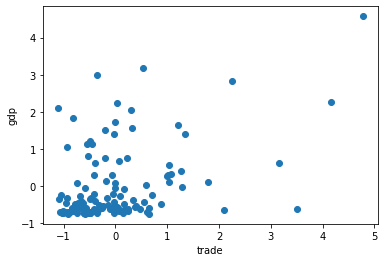

In [159]:
plt.scatter(data.trade, data.gdp)
plt.ylabel('gdp')
plt.xlabel('trade')
plt.show()

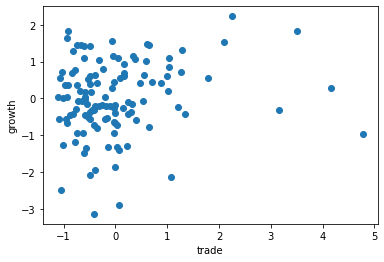

In [160]:
plt.scatter(data.trade, data.growth)
plt.ylabel('growth')
plt.xlabel('trade')
plt.show()

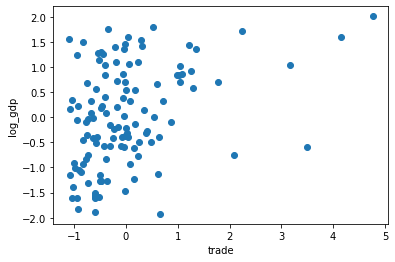

In [161]:
plt.scatter(data.trade, data.log_gdp)
plt.ylabel('log_gdp')
plt.xlabel('trade')
plt.show()

## Linear Regression Model

### Fitting the model

Let's fit a linear regressor for the data

In [162]:
X1 = data.drop(['country', 'gdp', 'growth', 'log_gdp'], axis=1)
y1 = data.gdp
lr1 = LinearRegression().fit(X1, y1)
print(f'R2 Score: {lr1.score(X1, y1)}')

R2 Score: 0.5652516369041413


In [191]:
model1 = sm.OLS(y1, sm.add_constant(X1))
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     24.70
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.35e-18
Time:                        17:14:51   Log-Likelihood:                -121.30
No. Observations:                 121   AIC:                             256.6
Df Residuals:                     114   BIC:                             276.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.337e-17      0.062   7.02e-16      1.000      -0.122       0.122
trade                0.2590      0.065      3.956      0.000       0.129       0.389
fdi                 -0.2125      0.062     -3.419      0.001      -0.336      -0.089
savings              0.0963      0.071      1.360      0.176      -0.044       0.237
unemployment_ilo    -0.1449      0.066     -2.211      0.029      -0.275      -0.015
manufacturing       -0.1382      0.067     -2.052      0.042      -0.272      -0.005
life                 0.5571      0.070      7.944      0.000       0.418       0.696
==============================================================================
Omnibus:                       26.241   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.075
Skew:                           1.105   Prob(JB):                     8.90e-09
Kurtosis:                       4.572   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
X2 = data.drop(['country', 'gdp', 'growth', 'log_gdp'], axis=1)
y2 = data.growth
lr2 = LinearRegression().fit(X2, y2)
print(f'R2 Score: {lr2.score(X2, y2)}')

R2 Score: 0.09738644955477682


In [192]:
model2 = sm.OLS(y2, sm.add_constant(X2))
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.050
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0646
Time:                        17:15:35   Log-Likelihood:                -165.49
No. Observations:                 121   AIC:                             345.0
Df Residuals:                     114   BIC:                             364.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.559e-17      0.089  -2.88e-16      1.000      -0.176       0.176
trade                0.1896      0.094      2.010      0.047       0.003       0.377
fdi                  0.0887      0.090      0.990      0.324      -0.089       0.266
savings              0.0185      0.102      0.181      0.857      -0.184       0.221
unemployment_ilo    -0.0247      0.094     -0.262      0.794      -0.212       0.162
manufacturing        0.2272      0.097      2.340      0.021       0.035       0.420
life                -0.1736      0.101     -1.718      0.088      -0.374       0.027
==============================================================================
Omnibus:                       10.630   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.868
Skew:                          -0.646   Prob(JB):                      0.00437
Kurtosis:                       3.697   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
X3 = data.drop(['country', 'gdp', 'growth', 'log_gdp'], axis=1)
y3 = data.log_gdp
lr3 = LinearRegression().fit(X3, y3)
print(f'R2 Score: {lr3.score(X3, y3)}')

R2 Score: 0.7452543946371712


In [193]:
model3 = sm.OLS(y3, sm.add_constant(X3))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_gdp   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     55.58
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.35e-31
Time:                        17:15:43   Log-Likelihood:                -88.958
No. Observations:                 121   AIC:                             191.9
Df Residuals:                     114   BIC:                             211.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.037e-16      0.047  -1.28e-14      1.000      -0.094       0.094
trade                0.1150      0.050      2.294      0.024       0.016       0.214
fdi                 -0.1307      0.048     -2.747      0.007      -0.225      -0.036
savings              0.0749      0.054      1.382      0.170      -0.032       0.182
unemployment_ilo     0.0333      0.050      0.664      0.508      -0.066       0.133
manufacturing       -0.0475      0.052     -0.922      0.359      -0.150       0.055
life                 0.7815      0.054     14.558      0.000       0.675       0.888
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.161
Skew:                           0.055   Prob(JB):                        0.923
Kurtosis:                       2.859   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
with open('results3.txt', 'w') as f:
    f.write(results3.summary().as_text())

In [186]:
with open('results3.csv', 'w') as f:
    f.write(results3.summary().as_csv())

### Inferences

Let's find the coefficients of the model for each year

In [165]:
print(f'coef: {lr1.coef_} intercept: {lr1.intercept_}')

coef: [ 0.25900906 -0.21249871  0.09634317 -0.14494796 -0.13824692  0.55705242] intercept: -5.692143971374136e-16


In [166]:
print(f'coef: {lr2.coef_} intercept: {lr2.intercept_}')

coef: [ 0.18963738  0.08869357  0.01848093 -0.02473466  0.2272113  -0.1736249 ] intercept: 2.542332370873219e-16


In [167]:
print(f'coef: {lr3.coef_} intercept: {lr3.intercept_}')

coef: [ 0.11497851 -0.13070553  0.07492535  0.03332636 -0.04753271  0.78145354] intercept: -1.5548253368630348e-15


In [171]:
data.columns[3:-1]

Index(['trade', 'fdi', 'savings', 'unemployment_ilo', 'manufacturing', 'life'], dtype='object')

### Plotting the variables

We will now plot the target variable with respect to each independent variable

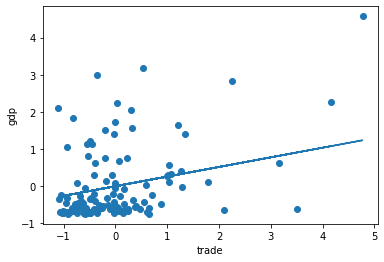

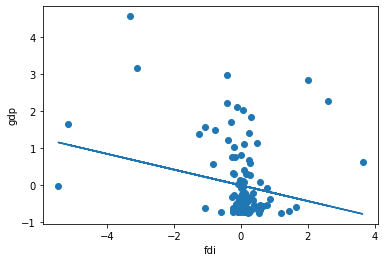

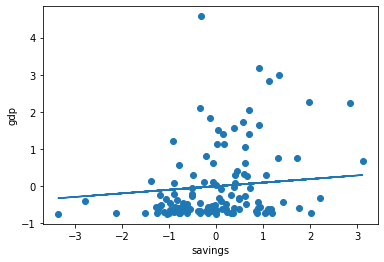

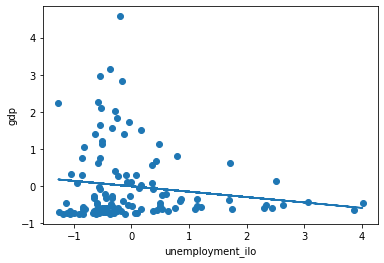

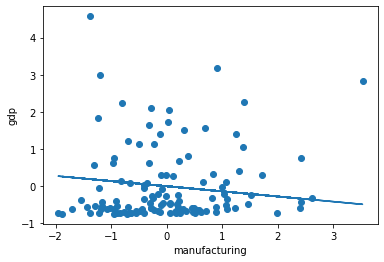

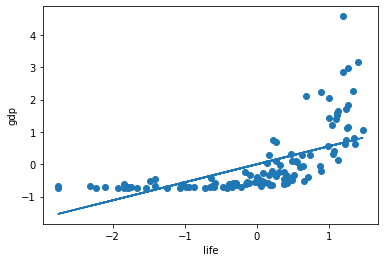

In [168]:
for i, col in enumerate(data.columns[3:-1]):
    plt.scatter(X1[col], y1)
    y_pred = lr1.coef_[i] * X1[col] + lr1.intercept_
    plt.plot(X1[col], y_pred)
    # plt.title(year)
    plt.ylabel('gdp')
    plt.xlabel(col)
    plt.show()

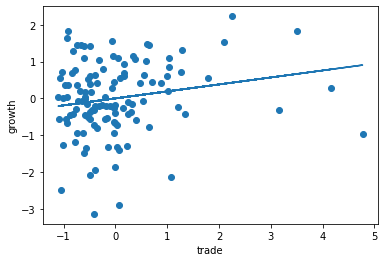

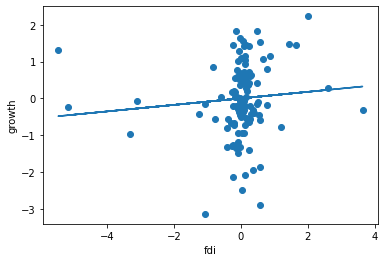

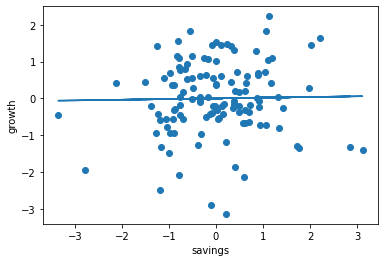

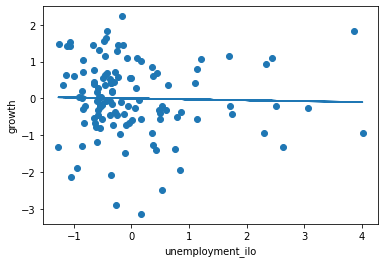

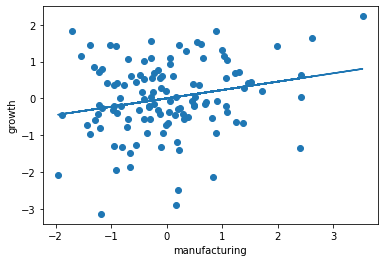

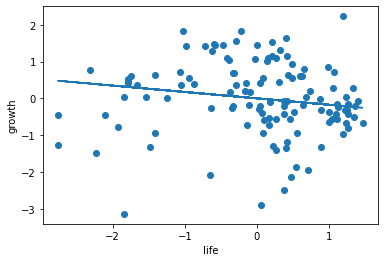

In [169]:
for i, col in enumerate(data.columns[3:-1]):
    plt.scatter(X2[col], y2)
    y_pred = lr2.coef_[i] * X2[col] + lr2.intercept_
    plt.plot(X2[col], y_pred)
    # plt.title(year)
    plt.ylabel('growth')
    plt.xlabel(col)
    plt.show()

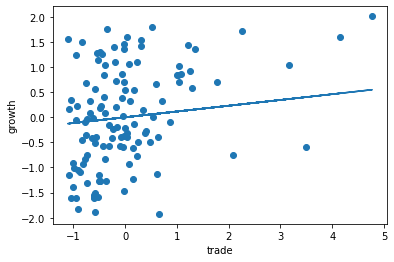

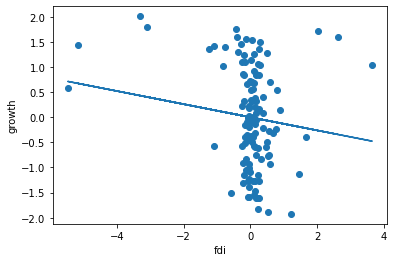

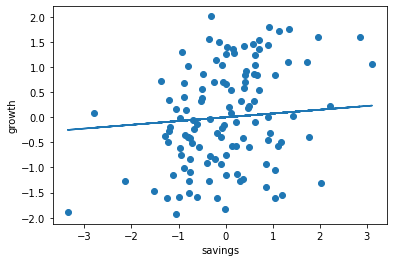

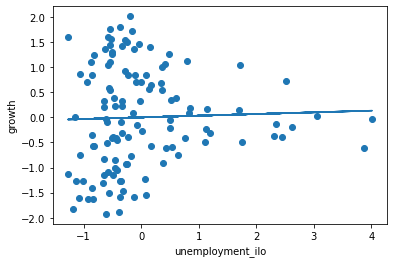

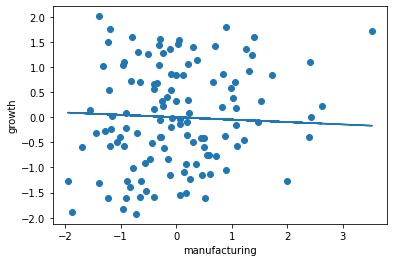

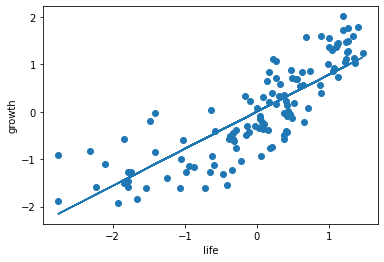

In [170]:
for i, col in enumerate(data.columns[3:-1]):
    plt.scatter(X3[col], y3)
    y_pred = lr3.coef_[i] * X3[col] + lr3.intercept_
    plt.plot(X3[col], y_pred)
    # plt.title(year)
    plt.ylabel('growth')
    plt.xlabel(col)
    plt.show()